In [2]:
import xarray as xr
import glob
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import hvplot as hv
import hvplot.xarray
import rioxarray
import fsspec

import gzip
import tqdm

## SMB

In [2]:
# find all files starting with snowmlet in the specified directory using glob
directory =  "../../../rcm/noel_2km/annual_maps/"
smb_past_filename = glob.glob(directory + "smb*.nc")
smb_past_filename

['../../../rcm/noel_2km/annual_maps/smb_rec.1979-2021.RACMO2.3p2_ANT27_ERA5-3h.AIS.2km.YY.nc']

In [52]:
smb_past = xr.open_dataset(smb_past_filename[0]).load()
smb_past.smb_rec.attrs['units'] = "mm w.e. per year"   #https://zenodo.org/records/10007855

In [53]:
smb_past


<xarray.Dataset> Size: 1GB
Dimensions:  (time: 43, x: 2778, y: 2303)
Coordinates:
  * time     (time) datetime64[ns] 344B 1979-06-30T18:00:00 ... 2021-06-30T18...
  * x        (x) float32 11kB -2.731e+06 -2.729e+06 ... 2.821e+06 2.823e+06
  * y        (y) float32 9kB -2.232e+06 -2.23e+06 ... 2.37e+06 2.372e+06
Data variables:
    smb_rec  (time, y, x) float32 1GB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 2.2.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    grid:         Map Projection: Antarctic Polar Stereographic EPSG3031 - Ma...
    netcdf:       4.7.4 of Apr 18 2020 10:56:44 $
    frequency:    mon
    CDO:          Climate Data Operators version 2.2.2 (https://mpimet.mpg.de...
    institution:  IMAU/ULiège (Brice Noël)
    NCO:          netCDF Operators version 5.1.7 (Homepage = http://nco.sf.ne...
    title:        Annual SMB field at 2km (RACMO2.3p2) ERA

In [5]:
lake = gpd.read_file("../../../remote sensing/worldview/lake_volume/lake_outline_1.shp").to_crs(3031)
lake_bounds = lake.bounds.values[0]

In [6]:
def expand_roi(bounds, L):
    return (bounds[0] - L, bounds[1] - L, bounds[2] + L, bounds[3] + L)

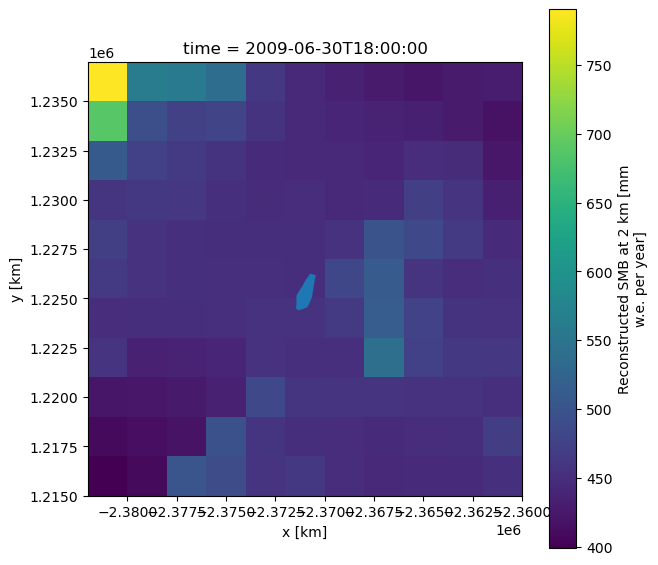

In [58]:
roi = expand_roi(lake_bounds, 10000)      

fig, ax = plt.subplots(figsize=(7, 7))

smb_past.sel(x =slice(roi[0], roi[2]),
       y =slice(roi[1], roi[3])).isel(time = 30).smb_rec.plot(ax = ax)
lake.plot(ax=ax)
ax.set_aspect('equal')


Text(0.5, 1.0, 'SMB at Lake')

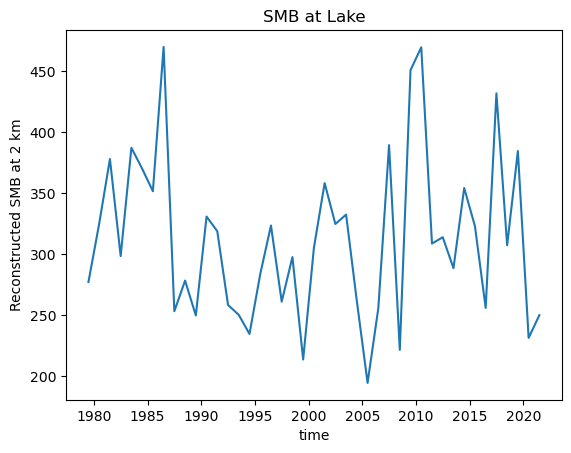

In [8]:
P = lake.centroid
x = P.x.values[0]
y = P.y.values[0]
smb_past.sel(x = x, y = y, method = 'nearest').smb_rec.plot()
plt.title("SMB at Lake")

## ERA5 snowmelt (1979-2021)


In [9]:
directory =  "../../../rcm/noel_2km/annual_maps/"
snowmelt_past_ERA_filename = glob.glob(directory + "snowmelt*ERA5*.nc")
snowmelt_past_ERA_filename

['../../../rcm/noel_2km/annual_maps/snowmelt.1979-2021.RACMO2.3p2_ANT27_ERA5-3h.AIS.2km.YY.nc']

In [10]:
snowmelt_past_ERA = xr.open_dataset(snowmelt_past_ERA_filename[0]).load()

In [11]:
snowmelt_past_ERA

<xarray.Dataset> Size: 1GB
Dimensions:       (time: 43, x: 2778, y: 2303)
Coordinates:
  * time          (time) datetime64[ns] 344B 1979-06-30T18:00:00 ... 2021-06-...
  * x             (x) float32 11kB -2.731e+06 -2.729e+06 ... 2.821e+06 2.823e+06
  * y             (y) float32 9kB -2.232e+06 -2.23e+06 ... 2.37e+06 2.372e+06
Data variables:
    snowmeltcorr  (time, y, x) float32 1GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 2.2.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    grid:         Map Projection: Antarctic Polar Stereographic EPSG3031 - Ma...
    netcdf:       4.7.4 of Apr 18 2020 10:56:44 $
    frequency:    mon
    CDO:          Climate Data Operators version 2.2.2 (https://mpimet.mpg.de...
    title:        Annual snowmelt field at 2km (RACMO2.3p2) ERA
    NCO:          netCDF Operators version 5.1.7 (Homepage = http://nco.sf.ne...
    institution:  IMAU/ULiège (Brice Noël)

In [12]:
snowmelt_past_ERA.snowmeltcorr.attrs['units'] = "mm w.e. per year"   #https://zenodo.org/records/10007855

Text(0.5, 1.0, 'snowmelt and SMB at the lake on FG')

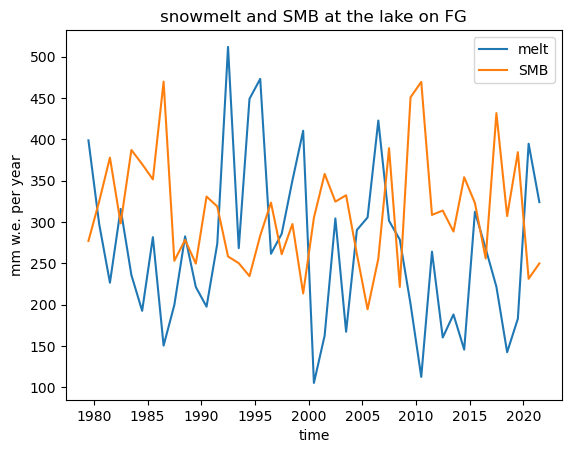

In [ ]:
snowmelt_past_ERA.sel(x = x, y = y, method = 'nearest').snowmeltcorr.plot(label = "melt")
smb_past.sel(x = x, y = y, method = 'nearest').smb_rec.plot(label = 'SMB')
plt.legend()
plt.ylabel("mm w.e. per year")
plt.title("snowmelt and SMB at the lake on FG")

In [73]:
snowmelt_past_ERA.sel(x = x, y = y, method = 'nearest').snowmeltcorr.hvplot(label = "melt")


:Curve   [time]   (Melt at 2 km)

In [67]:
snowmelt_past_ERA

<xarray.Dataset> Size: 1GB
Dimensions:       (time: 43, x: 2778, y: 2303)
Coordinates:
  * time          (time) datetime64[ns] 344B 1979-06-30T18:00:00 ... 2021-06-...
  * x             (x) float32 11kB -2.731e+06 -2.729e+06 ... 2.821e+06 2.823e+06
  * y             (y) float32 9kB -2.232e+06 -2.23e+06 ... 2.37e+06 2.372e+06
Data variables:
    snowmeltcorr  (time, y, x) float32 1GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 2.2.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    grid:         Map Projection: Antarctic Polar Stereographic EPSG3031 - Ma...
    netcdf:       4.7.4 of Apr 18 2020 10:56:44 $
    frequency:    mon
    CDO:          Climate Data Operators version 2.2.2 (https://mpimet.mpg.de...
    title:        Annual snowmelt field at 2km (RACMO2.3p2) ERA
    NCO:          netCDF Operators version 5.1.7 (Homepage = http://nco.sf.ne...
    institution:  IMAU/ULiège (Brice Noël)

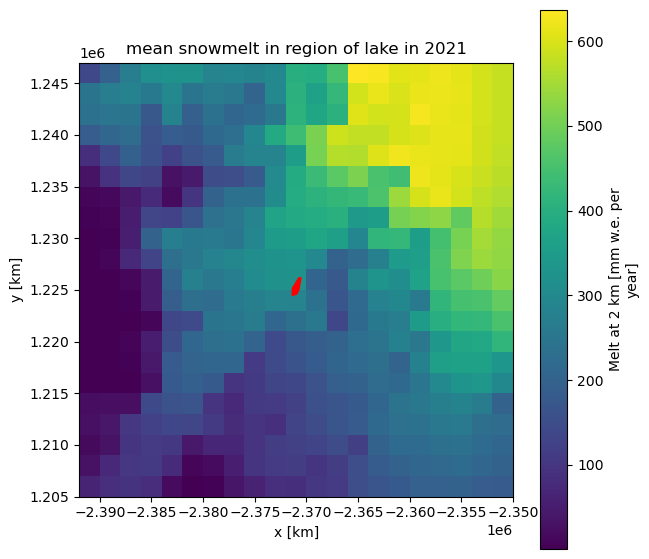

In [78]:
roi = expand_roi(lake_bounds, 20000)      

fig, ax = plt.subplots(figsize=(7, 7))

snowmelt_past_ERA.sel(x =slice(roi[0], roi[2]),
       y =slice(roi[1], roi[3])).isel(time = 42).snowmeltcorr.plot(ax = ax)
lake.plot(ax=ax, color = "red")
ax.set_title("mean snowmelt in region of lake in 2021")

ax.set_aspect('equal')

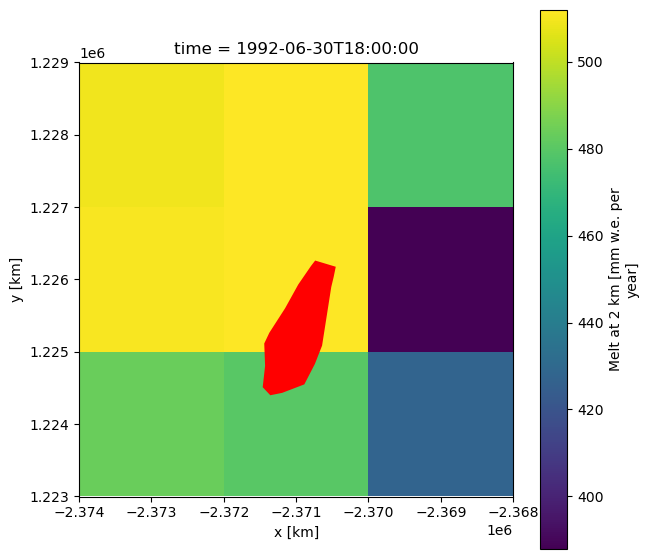

In [96]:
roi = expand_roi(lake_bounds, 2000)      

fig, ax = plt.subplots(figsize=(7, 7))

snowmelt_past_ERA.sel(x =slice(roi[0], roi[2]),
       y =slice(roi[1], roi[3])).isel(time = 13).snowmeltcorr.plot(ax = ax)
lake.plot(ax=ax, color = "red")
#ax.set_title("mean snowmelt in region of lake in 2021")

ax.set_aspect('equal')

In [95]:
roi = expand_roi(lake_bounds, 2000)      



snowmelt_past_ERA.sel(x =slice(roi[0], roi[2]),
       y =slice(roi[1], roi[3])).snowmeltcorr.hvplot(x = "x", y = "y", clim = (0, 1000), cmap = "viridis", aspect = "equal",)


BokehModel(combine_events=True, render_bundle={'docs_json': {'e4efc640-dad1-4b06-86bc-b6db31489551': {'version…

## All snowmelts


In [183]:
directory =  "../../../rcm/noel_2km/annual_maps/"
files = glob.glob(directory + "snowmelt*.nc")
files.sort()
files

['../../../rcm/noel_2km/annual_maps/snowmelt.1950-2014.RACMO2.3p2_ANT27_CESM2_HIST.AIS.2km.YY.nc',
 '../../../rcm/noel_2km/annual_maps/snowmelt.1979-2021.RACMO2.3p2_ANT27_ERA5-3h.AIS.2km.YY.nc',
 '../../../rcm/noel_2km/annual_maps/snowmelt.2015-2099.RACMO2.3p2_ANT27_CESM2_SSP126.AIS.2km.YY.nc',
 '../../../rcm/noel_2km/annual_maps/snowmelt.2015-2099.RACMO2.3p2_ANT27_CESM2_SSP245.AIS.2km.YY.nc',
 '../../../rcm/noel_2km/annual_maps/snowmelt.2015-2099.RACMO2.3p2_ANT27_CESM2_SSP585.AIS.2km.YY.nc']

In [184]:
sim_names  = ['_'.join(os.path.basename(file).split(".")[3].split("_")[2:]) for file in files]
sim_names

['CESM2_HIST', 'ERA5-3h', 'CESM2_SSP126', 'CESM2_SSP245', 'CESM2_SSP585']

In [185]:
da_list[0].name

'CESM2_SSP245'

In [186]:
da_list = [xr.open_dataset(file).snowmeltcorr.load().rename(sim_names) for file, sim_names in zip(files,sim_names)] 


In [197]:
da_list[0].sel(time = slice('1950-01-01', '2020-01-01'))

<xarray.DataArray 'CESM2_HIST' (time: 65, y: 2303, x: 2778)> Size: 2GB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]],
      shape=(65, 2303, 2778), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 520B 1950-06-30T18:00:00 ... 2014-06-30T18...
  * x        (x) float32 11kB -2.731e+06 -2.729e+06 ... 2.821e+06 2.823e+06
  * y        (y) float32 9kB -2.232e+06 -2.23e+06 ... 2.37e+06 2.372e+06
Attributes:
    cell_methods:   time: sum time: mean
    actual_range:   [  0.      148.92151]
    long_name:      Melt at 2 km
    standard_name:  Melt at 2 km

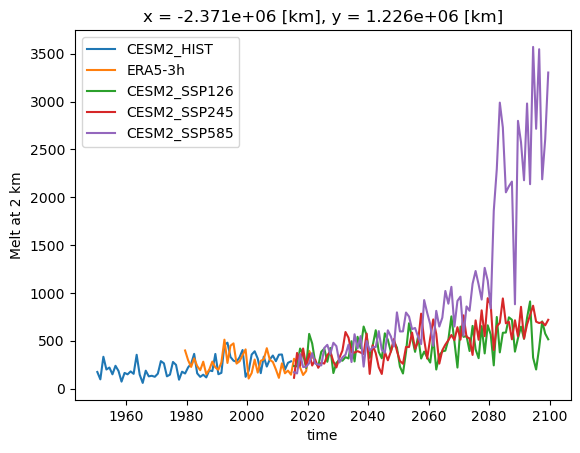

In [211]:
for da in da_list:
    #da_sub = da.sel(time = slice('1950-01-01', '2015-01-01')).sel(x = x, y = y, method = 'nearest').plot(label=da.name )
    da_sub = da.sel(x = x, y = y, method = 'nearest').plot(label=da.name )


#plt.show()
plt.legend()
#plt.xlim((1950,2020))


## snowmelt ERA 5h (daily)

In [3]:
fs = fsspec.filesystem("gcs")
files = fs.glob("ldeo-glaciology/RACMO_2km/snowmelt/*.nc.gz")
files = [f"gcs://{file}" for file in files]
len(files)

52

In [4]:
def load_gcs_gz_dataset(gcs_url):
    """
    Load a gzipped NetCDF dataset from Google Cloud Storage (GCS) using xarray.
    
    Parameters:
    gcs_url (str): The GCS URL of the gzipped NetCDF file.
    
    Returns:
    xarray.Dataarray: The loaded dataset.
    """
    # Open the GCS file as binary
    with fsspec.open(gcs_url, mode='rb') as gcs_file:
        # Decompress with gzip
        with gzip.GzipFile(fileobj=gcs_file, mode='rb') as gz_file:
            # Load with xarray using netCDF4 engine
            return xr.open_dataset(gz_file, chunks=True)



In [5]:
def extract_snowmelt_DA(gcs_url):
    ds = load_gcs_gz_dataset(gcs_url)
    ds.snowmeltcorr.attrs = ds.snowmeltcorr.attrs | ds.attrs
    return ds.snowmeltcorr
daily_da_list  = extract_snowmelt_DA(files[0]) # [extract_snowmelt_DA(file) for file in tqdm.tqdm(files)]

In [13]:
!rm -rf snowmelt_1.zarr


In [ ]:
daily_da_list.to_zarr("snowmelt_1.zarr")

In [11]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(
                          locals().items())), key= lambda x: -x[1])[:30]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                           _i4:  614.0 B
                            _i:  595.0 B
                          _iii:  595.0 B
                           _i8:  595.0 B
                          _i10:  595.0 B
                          _i11:  595.0 B
                         files:  472.0 B
                           _i5:  314.0 B
                           _i1:  243.0 B
                           _i2:  243.0 B
                           _oh:  224.0 B
                           Out:  224.0 B
                           _i3:  195.0 B
                           _ih:  184.0 B
                            In:  184.0 B
                          open:  152.0 B
           load_gcs_gz_dataset:  152.0 B
           extract_snowmelt_DA:  152.0 B
                    sizeof_fmt:  152.0 B
                       __doc__:  113.0 B
                   __session__:  110.0 B
                             _:   96.0 B
                 daily_da_list:   96.0 B
                            _7:   96.0 B
                

In [9]:
a = 9

In [44]:
mask = rioxarray.open_rasterio('/Users/jkingslake/Documents/science/meltwater_routing/BFRN_meltwater/data/Mask_Antarctica_v02.tif')   # https://n5eil01u.ecs.nsidc.org/MEASURES/NSIDC-0709.002/1992.02.07/Mask_Antarctica_v02.tif

mask = mask.squeeze().drop_vars('band')
mask = mask.rio.reproject('EPSG:3031')


Error in callback <function flush_figures at 0x1696edd00> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

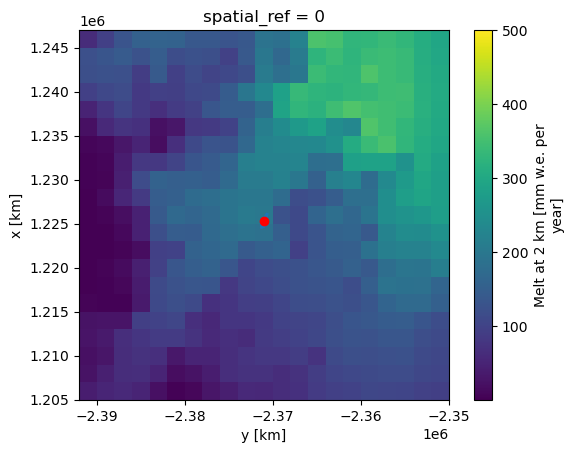

In [37]:
roi = expand_roi(lake_bounds, 20000)      
P = lake.centroid
x = P.x.values[0]
y = P.y.values[0]



sub = snowmelt_past_ERA.sel(x =slice(roi[0], roi[2]),
       y =slice(roi[1], roi[3])).isel(time = 30)
mask_subset = mask.interp_like(sub)
sub.snowmeltcorr.plot(vmax=500)
ax = plt.gca()
lake.plot(ax = ax)
P.plot(ax = ax, color = 'red')
mask_subset.plot.contour(x ='y', y = 'x', levels=[0.0, 0.01])


In [38]:
mask_subset

<xarray.DataArray (y: 21, x: 21)> Size: 4kB
array([[255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. ],
       [255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. ],
       [255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. ],
       [255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. ],
       [255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. ],
       [255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. ],
       [255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
...
        255. , 255. , 255. , 255. , 255. , 255. , 255. , 190. , 125. ,
        125. , 125. , 125. ],
       [255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 255. , 255. , 255. , 125. , 125. ,
        125. , 125. , 125. ],
       [255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 125. , 125. , 125. , 125. , 125. ,
        125. , 125. , 125. ],
       [255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 125. , 125. , 157.5, 125. , 125. ,
        125. , 125. , 125. ],
       [255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 190. , 125. , 125. , 125. , 125. ,
        125. , 125. , 125. ],
       [255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 255. , 125. , 125. , 125. , 125. ,
        125. , 125. , 125. ],
       [255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. , 255. ,
        255. , 255. , 255. , 255. , 157.5, 125. , 125. , 125. , 125. ,
        125. , 125. , 125. ]])
Coordinates:
    spatial_ref  int64 8B 0
  * x            (x) float32 84B -2.391e+06 -2.389e+06 ... -2.353e+06 -2.351e+06
  * y            (y) float32 84B 1.206e+06 1.208e+06 ... 1.244e+06 1.246e+06
Attributes:
    TIFFTAG_SOFTWARE:  Created with GAMMA Software www.gamma-rs.ch
    TIFFTAG_DATETIME:  2017:03:02 09:34:16
    AREA_OR_POINT:     Point
    scale_factor:      1.0
    add_offset:        0.0

In [15]:
snowmelt_past_ERA

<xarray.Dataset> Size: 1GB
Dimensions:       (time: 43, x: 2778, y: 2303)
Coordinates:
  * time          (time) datetime64[ns] 344B 1979-06-30T18:00:00 ... 2021-06-...
  * x             (x) float32 11kB -2.731e+06 -2.729e+06 ... 2.821e+06 2.823e+06
  * y             (y) float32 9kB -2.232e+06 -2.23e+06 ... 2.37e+06 2.372e+06
Data variables:
    snowmeltcorr  (time, y, x) float32 1GB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 2.2.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    grid:         Map Projection: Antarctic Polar Stereographic EPSG3031 - Ma...
    netcdf:       4.7.4 of Apr 18 2020 10:56:44 $
    frequency:    mon
    CDO:          Climate Data Operators version 2.2.2 (https://mpimet.mpg.de...
    title:        Annual snowmelt field at 2km (RACMO2.3p2) ERA
    NCO:          netCDF Operators version 5.1.7 (Homepage = http://nco.sf.ne...
    institution:  IMAU/ULiège (Brice Noël)

In [19]:

roi = expand_roi(lake_bounds, 30000)      

snowmelt_past_ERA.sel(x =slice(roi[0], roi[2]),
       y =slice(roi[1], roi[3])).snowmeltcorr.hvplot(x = 'x', y = 'y', width=700, height=700, cmap='viridis', clim=(0, 1000), colorbar=True, title="Snowmelt (mm w.e. per year)")

BokehModel(combine_events=True, render_bundle={'docs_json': {'1a640c83-86f1-4e6e-9e9a-148002b93644': {'version…